In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AIForEngineersProject/Data/cleaned_data_NEW.csv")
df.head()

,Unnamed: 0,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,...,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN,CLASS
0,0,140,125,9.0,0.0,0.0,0.277778,0.062963,0.666667,0.311111,...,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818,1
1,1,188,133,9.0,0.0,0.0,0.333333,0.266667,0.500000,0.077778,...,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817,1
2,2,105,139,9.0,0.0,0.0,0.277778,0.107407,0.833333,0.522222,...,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946,1
3,3,34,137,9.0,0.0,0.0,0.500000,0.166667,1.111111,0.474074,...,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272,1
4,4,39,111,9.0,0.0,0.0,0.722222,0.374074,0.888889,0.429629,...,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773,1


In [ ]:
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN,CLASS
0,140,125,9.0,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818,1
1,188,133,9.0,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817,1
2,105,139,9.0,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946,1
3,34,137,9.0,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272,1
4,39,111,9.0,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773,1


# Data Visualizations for Feature Importance

### Correlation Matrix Represented with Heatmap

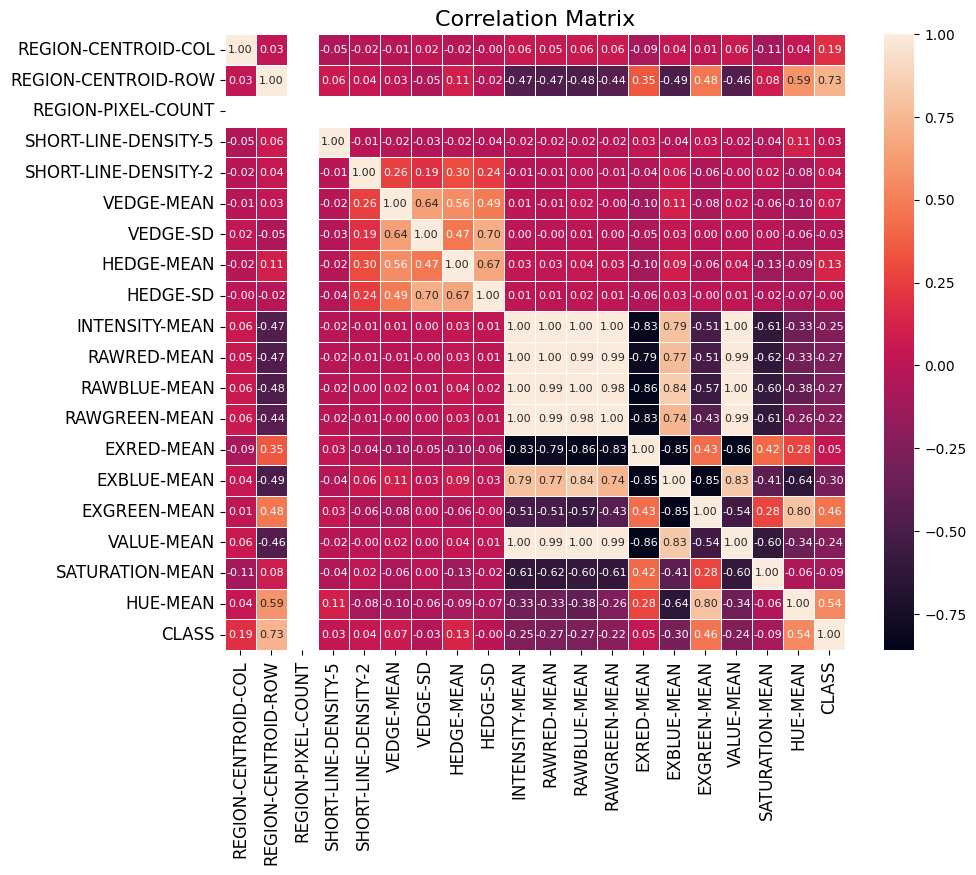

In [ ]:
corr = df.corr()

# Heatmap for Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Bar Plot to represent Correlation

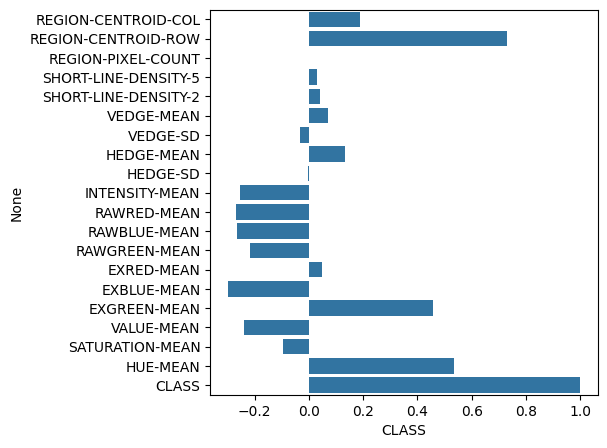

In [ ]:
# bar plot for correlation

plt.figure(figsize=(5, 5))
sns.barplot(x = df.corr()['CLASS'], y=df.corr()['CLASS'].index)
plt.show()

### From our graphical interpretations, we see that there are multiple features that have higher importance and correlation to our output feature 'class' Some of these features include 'hue-mean', 'region-centroid-row', and 'exgreen-mean'. We claimed in our proposal that we assume the features with the highest importance could be be the features that deal with representation of color, and that seems to be true.

# We will use SelectKBest to perform Feature Selection
### SelectKBest is a filter-based feature selection method, and we choose this method because SelectKBest can act independent of any Machine Learning Algorithm.

In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest

# We will use an arbitrary value of k = 12, to keep the best 12 features. This can be changed in the future if performance is low
y = df['CLASS']
X = df.drop(['CLASS'], axis=1)

# Get names of features
feature_names = X.columns.tolist()

# Initialize selector
selector = SelectKBest(score_func=f_classif, k=12)  # Select top 12 features

# Fit the selector to the data
X_new_kbest = selector.fit_transform(X, y)

# Get a mask of the selected features
selected_mask = selector.get_support()

# Filter feature names using the selected mask
selected_feature_names = [feature_names[i] for i, selected in enumerate(selected_mask) if selected]

print("Selected features:")
print(selected_feature_names)

Selected features:
['REGION-CENTROID-ROW', 'HEDGE-MEAN', 'INTENSITY-MEAN', 'RAWRED-MEAN', 'RAWBLUE-MEAN', 'RAWGREEN-MEAN', 'EXRED-MEAN', 'EXBLUE-MEAN', 'EXGREEN-MEAN', 'VALUE-MEAN', 'SATURATION-MEAN', 'HUE-MEAN']


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [2] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


### We see from the SelectKBest (k=12) we are able to say the top 12 features that help us predict our class is ['region-centroid-col', 'region-centroid-row', 'intensity-mean', 'rawred-mean', 'rawblue-mean', 'rawgreen-mean', 'exred-mean', 'exblue-mean', 'exgreen-mean', 'value-mean', 'saturation-mean', 'hue-mean']

# Create new dataframe from selected features and export as CSV

In [ ]:
# Initialize new X dataframe

X_df = pd.DataFrame(X_new_kbest, columns = selected_feature_names)
X_df.head()

,REGION-CENTROID-ROW,HEDGE-MEAN,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,125.0,0.666667,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,133.0,0.500000,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,139.0,0.833333,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,137.0,1.111111,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,111.0,0.888889,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [ ]:
# new dataframe
new_df = pd.concat([X_df, y], axis=1)
new_df.head()

,REGION-CENTROID-ROW,HEDGE-MEAN,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN,CLASS
0,125.0,0.666667,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818,1
1,133.0,0.500000,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817,1
2,139.0,0.833333,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946,1
3,137.0,1.111111,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272,1
4,111.0,0.888889,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773,1


In [ ]:
new_df.shape

(2310, 13)

In [ ]:
# Save data into csv file
new_df.to_csv('/content/drive/MyDrive/Colab Notebooks/AIForEngineersProject/Data/cleaned_data_feature_selection_NEW.csv')